<a href="https://colab.research.google.com/github/raulbenitez/introML_GNSSACADEMY/blob/main/ACADEMYGNSS_introML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A brief introduction to machine learning

Topics:
1. Introduction & general concepts (30 min): Supervised and unsupervised methods, traditional machine learning vs deep learning
2. Data preprocessing (30 min): Data filtering, imputation of missing values, dimensionality reduction
3. Visualization of multidimensional data (30 min): Pairplots, histograms, t-SNE.
4. Training a data classification model (30 min): k-nearest neighbors, Naive Bayes classifier
5. Evaluation of classification performance (30 min): Type I and II errors, accuracy, recall, etc. 
6. Hands-on exercise (30 min)

Examples will use the google colab platform http://colab.research.google.com (gmail account required). 

Short bio:

Raul Benitez holds a PhD in physics and is professor at the department of Automatic Control of the Universitat Politècnica de Catalunya (Barcelona, Spain). He coordinates a research group in biomedical image processing that applies machine learning methods to recognize patterns in medical images. He is author of more than 30 journal papers, 77 contributions in international conferences and principal investigator of several national and international projects. 

https://futur.upc.edu/RaulBeniteziglesias

https://scholar.google.com/citations?user=9arewZYAAAAJ&hl=ca

contact: raul.benitez@upc.edu


# 1. Introduction & general concepts 

Supervised and unsupervised methods, traditional machine learning vs deep learning


# 2. Data preprocessing 
Data filtering, imputation of missing values, dimensionality reduction


## 2.1 Basic data manipulation

a) From an excel or csv file in a local folder:

Load the file into the workspace of the google colab session

In [1]:
from google.colab import files 
import io
uploaded = files.upload()

Saving test.xlsx to test.xlsx


Use pandas libraries to load data as a dataframe:

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('test.xlsx',index_col=0,header=2) 

Check dimensions of the dataframe:

In [3]:
df.shape

(9, 2)

Check the top rows of the dataframe:

In [ ]:
df.head()

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31

check columns/variable names

In [4]:
df.columns

Index(['Humans', 'Robots'], dtype='object')

Check type of one of the columns:

In [5]:
df['Robots'].dtype

dtype('int64')

Load column data as numpy array

In [6]:
v = df['Humans'].values

In [7]:
v[::2]

array([10, 16, 22, 28, 34])

Change the type of a column and create a new dataframe:

In [8]:
df1 = df['Robots'].astype(np.int32)

In [9]:
df1.dtype

dtype('int32')

Filter data using loc function:

In [10]:
import datetime 
df.loc[datetime.date(year=2019,month=1,day=1):datetime.date(year=2019,month=3,day=11)]

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10

Filter obserbations using a certain condition:

In [11]:
df.loc[df['Humans']>6]

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31
2019-03-15      25      38
2019-03-16      28      45
2019-03-17      31      52
2019-03-18      34      59

Create a new dataframe with the filtered data:

In [12]:
df2 = df.loc[df['Humans']>30]
df2.head()

Humans  Robots
Date                      
2019-03-17      31      52
2019-03-18      34      59

Filter with combined boolean conditions

In [13]:
df.loc[(df['Humans']>6) & (df['Robots']>20)]

Humans  Robots
Date                      
2019-03-13      19      24
2019-03-14      22      31
2019-03-15      25      38
2019-03-16      28      45
2019-03-17      31      52
2019-03-18      34      59

We can access the files that we have stored in our google drive. In order to access it, the google drive must be mounted on the network. It will ask us to put a verification code for access permissions.

In [14]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
file_path = '/content/gdrive/MyDrive/data_course/test.xlsx'
df3 = pd.read_excel(file_path,index_col=0,header=2)
df3.head()

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31

Read data from the raw link of the file in a GitHub repository:

In [22]:
file_path_git = 'https://github.com/raulbenitez/introML_GNSSACADEMY/raw/main/test.xlsx'
df4 = pd.read_excel(file_path_git,index_col=0,header=2)
df4.head()

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31

Read data from a 

## 2.2 The Titanic dataset

Let's consider a more interesting dataset:
https://www.kaggle.com/c/titanic



In [23]:
df1 = pd.read_csv('/content/gdrive/MyDrive/data_course/titanic/train.csv',index_col=0)
df1.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [24]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The first thing we can do is consult a descriptive statistical table of the data:

In [25]:
df1.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Each row corresponds to a passenger, and the columns are their attributes (if they survived, in what class, ticket price, etc).



We can look at what fraction we have of survivors of the total passengers in the database:

In [29]:
N = df1.shape[0]
Nsurvived = df1.loc[df1['Survived']==1].shape[0]
Ndead = df1.loc[df1['Survived']==0].shape[0]
print('There are {} passangers,  {} survived and {} did not'.format(N,Nsurvived,Ndead))

There are 891 passangers,  342 survived and 549 did not


Fraction of survival passangers:

In [30]:
print('Survived {} % of the passangers'.format(100*Nsurvived/N))

Survived 38.38383838383838 % of the passangers


Average attributes of the survival passangers:

In [32]:
df1.loc[df1['Survived']==1].mean()

Survived     1.000000
Pclass       1.950292
Age         28.343690
SibSp        0.473684
Parch        0.464912
Fare        48.395408
dtype: float64

We can calculate the average values ​​of the attributes based on whether or not they are survivors:

In [33]:
df1_grouped = df1.groupby(by=['Survived'])
df1_grouped.mean()

Pclass        Age     SibSp     Parch       Fare
Survived                                                    
0         2.531876  30.626179  0.553734  0.329690  22.117887
1         1.950292  28.343690  0.473684  0.464912  48.395408

In [34]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Madias of passengers grouped according to port of embarkation

In [35]:
df1.groupby(by=['Embarked']).mean()

Survived    Pclass        Age     SibSp     Parch       Fare
Embarked                                                              
C         0.553571  1.886905  30.814769  0.386905  0.363095  59.954144
Q         0.389610  2.909091  28.089286  0.428571  0.168831  13.276030
S         0.336957  2.350932  29.445397  0.571429  0.413043  27.079812

For example, we see that the survivors are, on average, younger and also were in higher class cabins. In fact, the variable Fare (what they paid for the ticket) is clearly higher in the survivors.

We can answer questions like: who is the youngest and oldest passenger in the data set?


In [36]:
df1.sort_values(by=['Age'],ascending=True)

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
804                 1       3  ...   NaN        C
756                 1       2  ...   NaN        S
645                 1       3  ...   NaN        C
470                 1       3  ...   NaN        C
79                  1       2  ...   NaN        S
...               ...     ...  ...   ...      ...
860                 0       3  ...   NaN        C
864                 0       3  ...   NaN        S
869                 0       3  ...   NaN        S
879                 0       3  ...   NaN        S
889                 0       3  ...   NaN        S

[891 rows x 11 columns]

List the values ​​that appear in a coumna without repeating, unique statement:


In [37]:
df1['Pclass'].unique()

array([3, 1, 2])



Remove a variable/column:

In [38]:
df1_noage = df1.drop(['Age'], axis=1)
df1_noage.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 10 columns]

## 2.3 Data imputation: Handling missing data

We see that we do not know the age of some of the passengers. Specifically, we have a total of 177 passengers whose age is unknown:


In [ ]:
df1.loc[df1['Age'].isna()==True].shape[0]

177

There are different strategies for dealing with unknown data:

a) The first would be to eliminate the passengers of whom we do not have their age:

In [ ]:
df1_conedad = df1['Age'].dropna()
df1_conedad.mean()

29.69911764705882

Eliminate the rows that present a NAN in any of the variables

In [39]:
df1_imputation1 = df1.dropna()
df1_imputation1.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
2                   1       1  ...   C85        C
4                   1       1  ...  C123        S
7                   0       1  ...   E46        S
11                  1       3  ...    G6        S
12                  1       1  ...  C103        S

[5 rows x 11 columns]

In [40]:
df1_imputation1.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000
mean     0.672131    1.191257   35.674426    0.464481    0.475410   78.682469
std      0.470725    0.515187   15.643866    0.644159    0.754617   76.347843
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.500000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200

Inplace parameter to overwrite the dataframe after the operation:

In [41]:
df2 = df1.copy()
df2.dropna(inplace=True)
df2.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000
mean     0.672131    1.191257   35.674426    0.464481    0.475410   78.682469
std      0.470725    0.515187   15.643866    0.644159    0.754617   76.347843
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.500000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200

b) The second way to proceed would be to replace their age with a constant value, for example for the average age of the rest of the passengers:

In [42]:
df1_fillmean = df1.fillna(df1.mean())
df1_fillmean.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [43]:
df1_fillmean.sort_values(by=['Age'],ascending=True)

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
804                 1       3  ...   NaN        C
756                 1       2  ...   NaN        S
645                 1       3  ...   NaN        C
470                 1       3  ...   NaN        C
832                 1       2  ...   NaN        S
...               ...     ...  ...   ...      ...
117                 0       3  ...   NaN        Q
97                  0       1  ...    A5        C
494                 0       1  ...   NaN        C
852                 0       3  ...   NaN        S
631                 1       1  ...   A23        S

[891 rows x 11 columns]

The third, and perhaps the most intelligent, would be to impute an age based on the age of passengers with similar numerical properties. That is why we will have to use the sklearn artificial intelligence libraries:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

First we define a dataframe that only contains the numeric attributes:

In [44]:
df1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

create a dataframe with only the numeric columns:

In [45]:
df1_num = df1.select_dtypes(include='number')
df1_num.head()

Survived  Pclass   Age  SibSp  Parch     Fare
PassengerId                                               
1                   0       3  22.0      1      0   7.2500
2                   1       1  38.0      1      0  71.2833
3                   1       3  26.0      0      0   7.9250
4                   1       1  35.0      1      0  53.1000
5                   0       3  35.0      0      0   8.0500

In [46]:
df1_num.loc[df1_num['Age'].isna()==True]

Survived  Pclass  Age  SibSp  Parch     Fare
PassengerId                                              
6                   0       3  NaN      0      0   8.4583
18                  1       2  NaN      0      0  13.0000
20                  1       3  NaN      0      0   7.2250
27                  0       3  NaN      0      0   7.2250
29                  1       3  NaN      0      0   7.8792
...               ...     ...  ...    ...    ...      ...
860                 0       3  NaN      0      0   7.2292
864                 0       3  NaN      8      2  69.5500
869                 0       3  NaN      0      0   9.5000
879                 0       3  NaN      0      0   7.8958
889                 0       3  NaN      1      2  23.4500

[177 rows x 6 columns]

In [47]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="distance")
imputed_data = imputer.fit_transform(df1_num)

df1_imputed = pd.DataFrame(imputed_data,columns=df1_num.columns)
df1_imputed.head()

Survived  Pclass   Age  SibSp  Parch     Fare
0       0.0     3.0  22.0    1.0    0.0   7.2500
1       1.0     1.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  35.0    1.0    0.0  53.1000
4       0.0     3.0  35.0    0.0    0.0   8.0500

Iterative imputer sklearn:

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_iterative = imp_mean.fit_transform(df1_num)

df1_imputed_iterative = pd.DataFrame(imp_iterative,columns=df1_num.columns)
df1_imputed_iterative.head()

Survived  Pclass   Age  SibSp  Parch     Fare
0       0.0     3.0  22.0    1.0    0.0   7.2500
1       1.0     1.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  35.0    1.0    0.0  53.1000
4       0.0     3.0  35.0    0.0    0.0   8.0500

Comment: We can also access this dataset and many other test data through some of the Python libraries to do data tractation. In this case, for example, from the Seaborn graphic representation libraries https://seaborn.pydata.org/

In [49]:
import seaborn as sns
dtitanic = sns.load_dataset('titanic')
dtitanic.head()

survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]

# 3. Visualization of multidimensional data  

Pairplots, histograms, t-SNE.



## 3.1 The mpg cars database

At this point, we need to start making graphs to represent different aspects of what we see in the data. To graph data in pandas dataframe format, the best option is to use the Seaborn libraries:

https://seaborn.pydata.org/

Let's consider the mpg cars dataset:


https://www.kaggle.com/uciml/autompg-dataset

The data set contains 9 attributes out of a total of 398 cars. Some attributes are numeric, others are categorical.

1. mpg: thousands per gallon: continuous
2. cylinders: multi-Valued discrete
3. displacement: continuous
4. Horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-Valued discrete (1: USA, 2: Europe, 3: Japan)
8. origin: multi-Valued discrete
9. caro name: string (unique for each instance)


Answer the following questions:

a) What is the age range of the cars included in the data?

b) How many cars are there that are from the year 74?

c) What is the mean weight and mean mpg of year 70 cars? And those of the year 80? Do you see any trend in the evolution of these two magnitudes as the model year increases?

In [ ]:
df2 = pd.read_csv('/content/gdrive/My Drive/data_course/mpg_cars/auto-mpg.csv')
df2.head()

mpg  cylinders  displacement  ... model year  origin                   car name
0  18.0          8         307.0  ...         70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70       1          buick skylark 320
2  18.0          8         318.0  ...         70       1         plymouth satellite
3  16.0          8         304.0  ...         70       1              amc rebel sst
4  17.0          8         302.0  ...         70       1                ford torino

[5 rows x 9 columns]

The first thing we can do is replace the numerical values in the origin column with the words that describe the origin of the car:


In [ ]:
df2['origin'] = df2.origin.replace([1,2,3],['USA','Europe','Japan'])
df2.head()

mpg  cylinders  displacement  ... model year  origin                   car name
0  18.0          8         307.0  ...         70     USA  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70     USA          buick skylark 320
2  18.0          8         318.0  ...         70     USA         plymouth satellite
3  16.0          8         304.0  ...         70     USA              amc rebel sst
4  17.0          8         302.0  ...         70     USA                ford torino

[5 rows x 9 columns]

In [ ]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

The models range from year 70 to year 82:

In [ ]:
df2.sort_values(by=['model year'])

mpg  cylinders  ...  origin                   car name
0    18.0          8  ...     USA  chevrolet chevelle malibu
28    9.0          8  ...     USA                   hi 1200d
27   11.0          8  ...     USA                 dodge d200
26   10.0          8  ...     USA                  chevy c20
25   10.0          8  ...     USA                  ford f250
..    ...        ...  ...     ...                        ...
368  27.0          4  ...     USA   chevrolet cavalier wagon
367  28.0          4  ...     USA         chevrolet cavalier
396  28.0          4  ...     USA                ford ranger
381  36.0          4  ...   Japan               honda accord
397  31.0          4  ...     USA                 chevy s-10

[398 rows x 9 columns]


We can get a statistical summary of the variables by executing

In [ ]:
df2.describe()

mpg   cylinders  ...  acceleration  model year
count  398.000000  398.000000  ...    398.000000  398.000000
mean    23.514573    5.454774  ...     15.568090   76.010050
std      7.815984    1.701004  ...      2.757689    3.697627
min      9.000000    3.000000  ...      8.000000   70.000000
25%     17.500000    4.000000  ...     13.825000   73.000000
50%     23.000000    4.000000  ...     15.500000   76.000000
75%     29.000000    8.000000  ...     17.175000   79.000000
max     46.600000    8.000000  ...     24.800000   82.000000

[8 rows x 6 columns]

df2.describe

In [ ]:
N70 = df2.loc[df2['model year']==70].shape[0]

print('Hay un total de {} coches del 70'.format(N70))

Hay un total de 29 coches del 70


A continuación podemos mirar la evolución de las diferentes características en función del año del modelo:

In [ ]:
df2.groupby(by=['model year']).mean()


mpg  cylinders  displacement       weight  acceleration
model year                                                               
70          17.689655   6.758621    281.413793  3372.793103     12.948276
71          21.250000   5.571429    209.750000  2995.428571     15.142857
72          18.714286   5.821429    218.375000  3237.714286     15.125000
73          17.100000   6.375000    256.875000  3419.025000     14.312500
74          22.703704   5.259259    171.740741  2877.925926     16.203704
75          20.266667   5.600000    205.533333  3176.800000     16.050000
76          21.573529   5.647059    197.794118  3078.735294     15.941176
77          23.375000   5.464286    191.392857  2997.357143     15.435714
78          24.061111   5.361111    177.805556  2861.805556     15.805556
79          25.093103   5.827586    206.689655  3055.344828     15.813793
80          33.696552   4.137931    115.827586  2436.655172     16.934483
81          30.334483   4.620690    135.310345  2522.931034     16.306897
82          31.709677   4.193548    128.870968  2453.548387     16.638710

The average weight and mpg of year 70 cars is (3,372.17.68) and that of year 80 cars is (2,436.33) respectively. It is clear that with the times, cars are more efficient (higher mpg) and lighter (less weight). This can be seen with the evolution of these two variables over the years.

## Basic plots

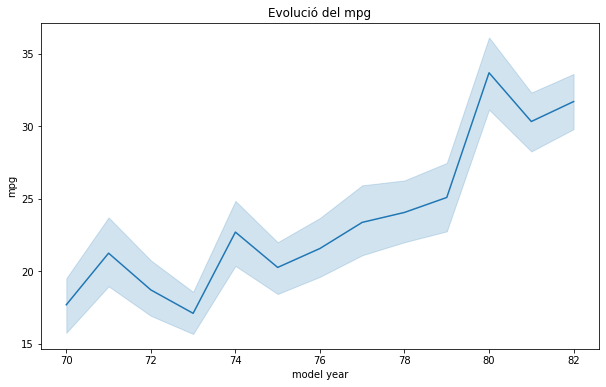

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
plt.show()
plt.savefig('evolucion.png')

## Multiple panels

We can make a figure with two panels, the upper one representing mpg and the lower one representing the evolution of weight:


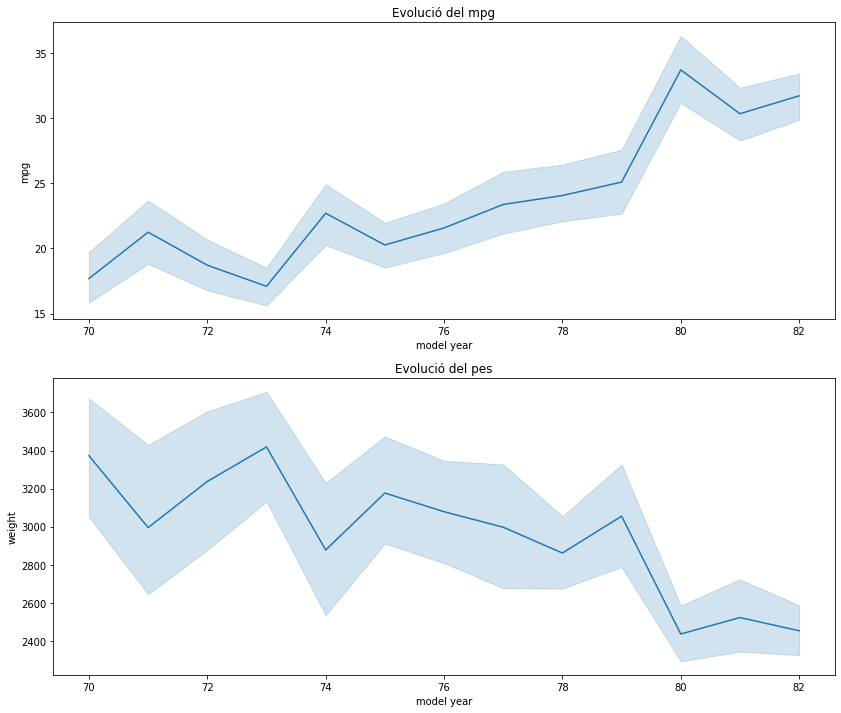

In [ ]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(211)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(212)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
plt.show()

Multiple panels in a single graph

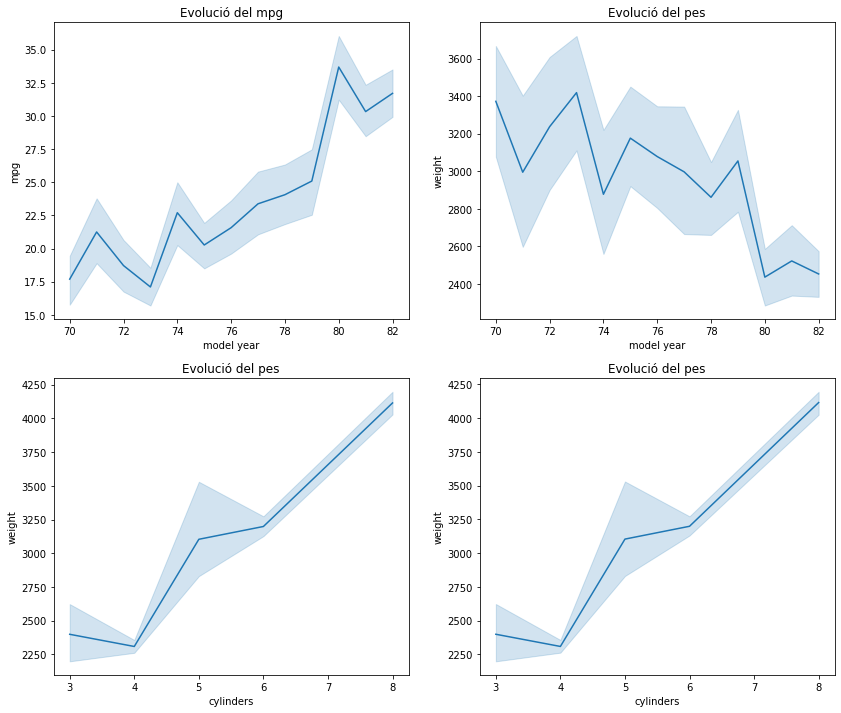

In [ ]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(221)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
ax2 = fig.add_subplot(223)
ax2 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax2.set_title('Evolució del pes')
ax3 = fig.add_subplot(224)
ax3 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax3.set_title('Evolució del pes')
plt.show()

## Grouping data in graphs

We can also look at how the mpg evolves depending on its origin:

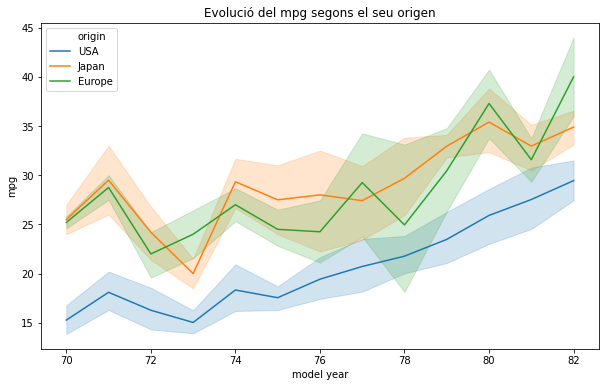

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg",hue='origin',data=df2)
ax.set_title('Evolució del mpg segons el seu origen')
plt.show()

## Scatter plots

Do we have any correlation between weight and efficiency? Let's look at it:


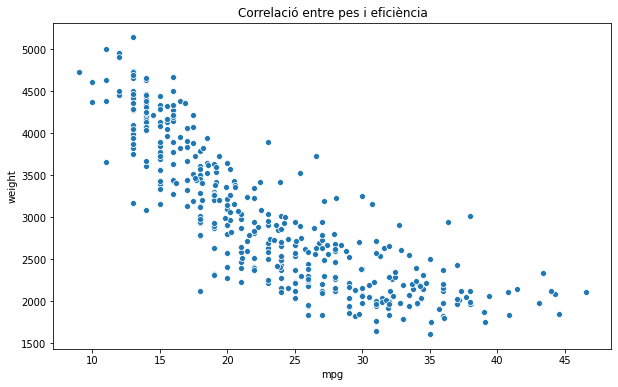

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mpg", y="weight", data=df2)
ax.set_title('Correlació entre pes i eficiència')
plt.show()

We can make a linear model of the behavior

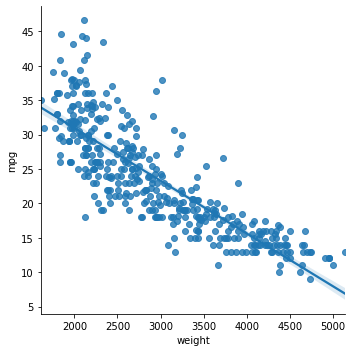

In [ ]:
ax = sns.lmplot(x="weight", y="mpg", data=df2)


Taking into account the origin, the relationship between weight and mpg may be different:

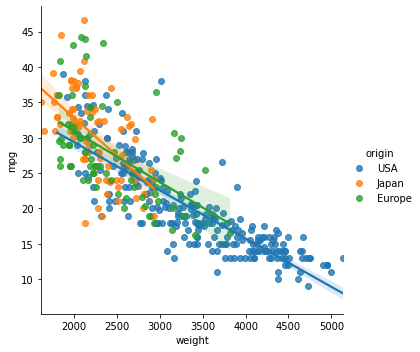

In [ ]:
ax = sns.lmplot(x="weight", y="mpg", hue='origin',data=df2)


In fact, we observe that cars of European and Japanese origin tend to have less weight and greater efficiency.

And if we want to represent the acceleration as a function of the number of cylinders? We've got many options:

A Scatterplot doesn't seem like the best option, because the cylinders variable takes discrete values:

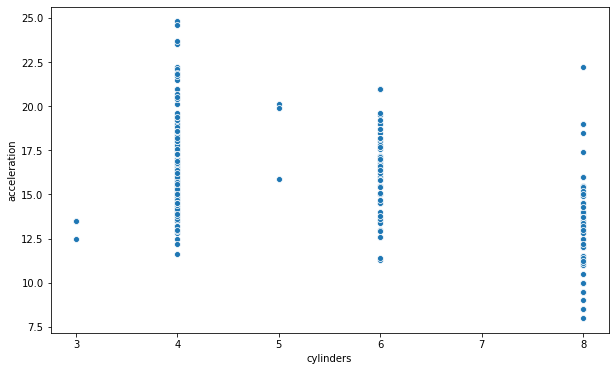

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="cylinders", y="acceleration", data=df2)
plt.show()

## Bar plots

Better a bar plot

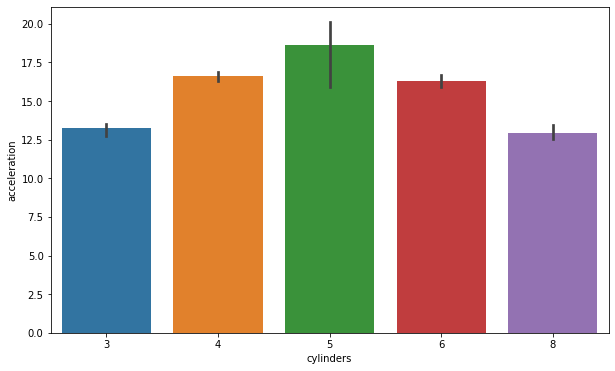

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", data=df2)
plt.show()

And depending on their origin we see that the cars with only 3 cylinders are Japanese and those with 8 are all the USA.

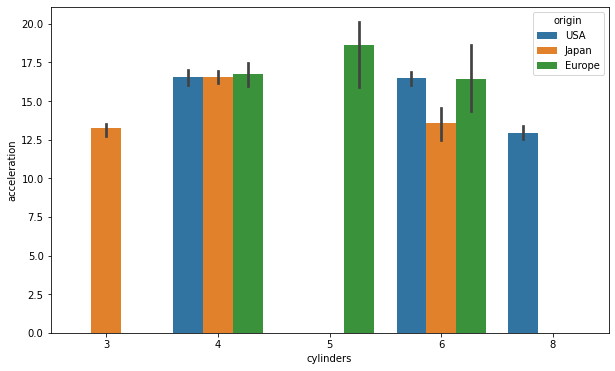

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", hue='origin',data=df2)
plt.show()

Acceleration vs weight as a function of cylinders


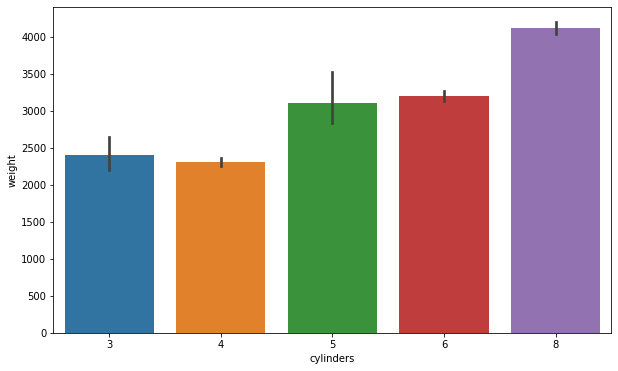

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="weight", data=df2)
plt.show()

## Histograms

Probability of observing a certain range of values in the distribution of a variable:

What is the distribution of the variable weight?

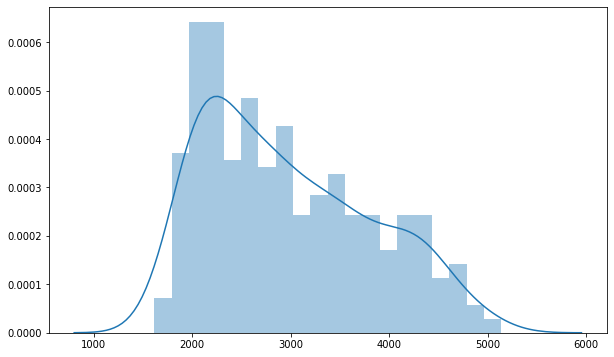

In [ ]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)

If we want to mark the position of the mean value and the median of the distribution

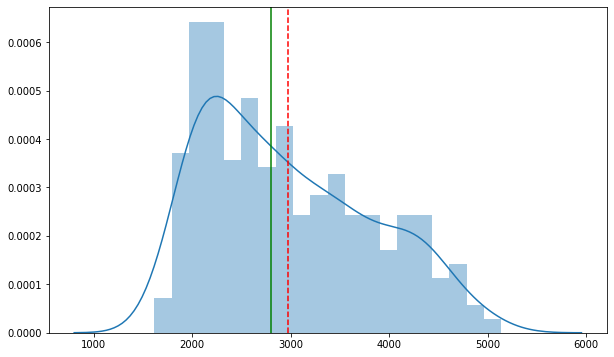

In [ ]:
media_weight = df2['weight'].mean()
mediana_weight = df2['weight'].median()

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="r", linestyle="--");
plt.axvline(mediana_weight, color="g", linestyle="-");

Indicate where the mean is and the standard deviations to the left and right of the mean:

In [ ]:
std_weight = df2['weight'].std()


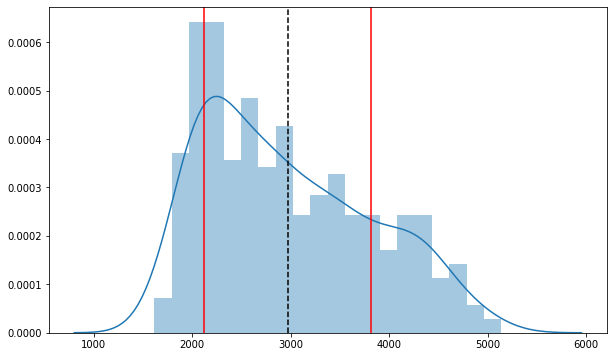

In [ ]:

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="k", linestyle="--");
plt.axvline(media_weight-std_weight, color="r", linestyle="-");
plt.axvline(media_weight+std_weight, color="r", linestyle="-");


## Joint distribution plots

What would the joint distribution of the weight and acceleration variables look like?

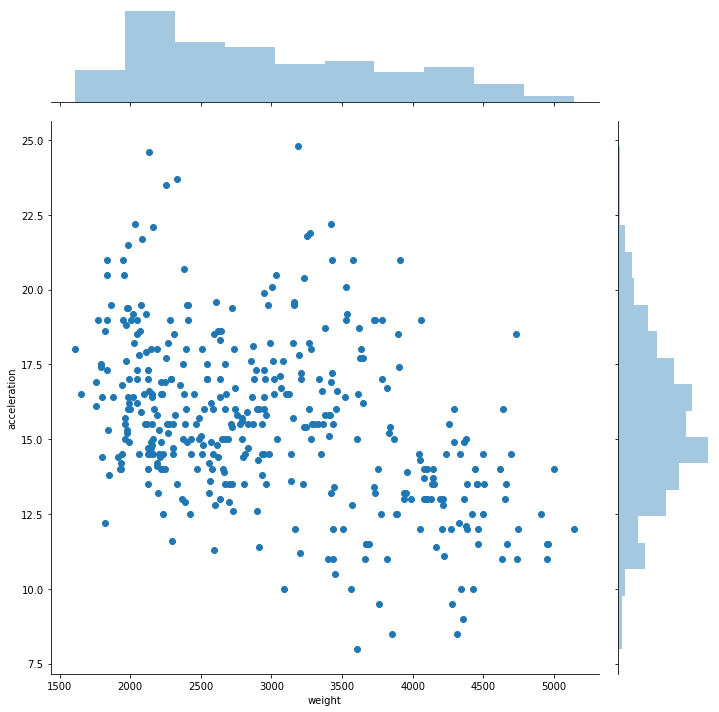

In [ ]:
ax = sns.jointplot(x='weight',y='acceleration',data=df2,height=10)

## Multidimensional scatter matrix

Finally, we can make a representation of all the variables simultaneously

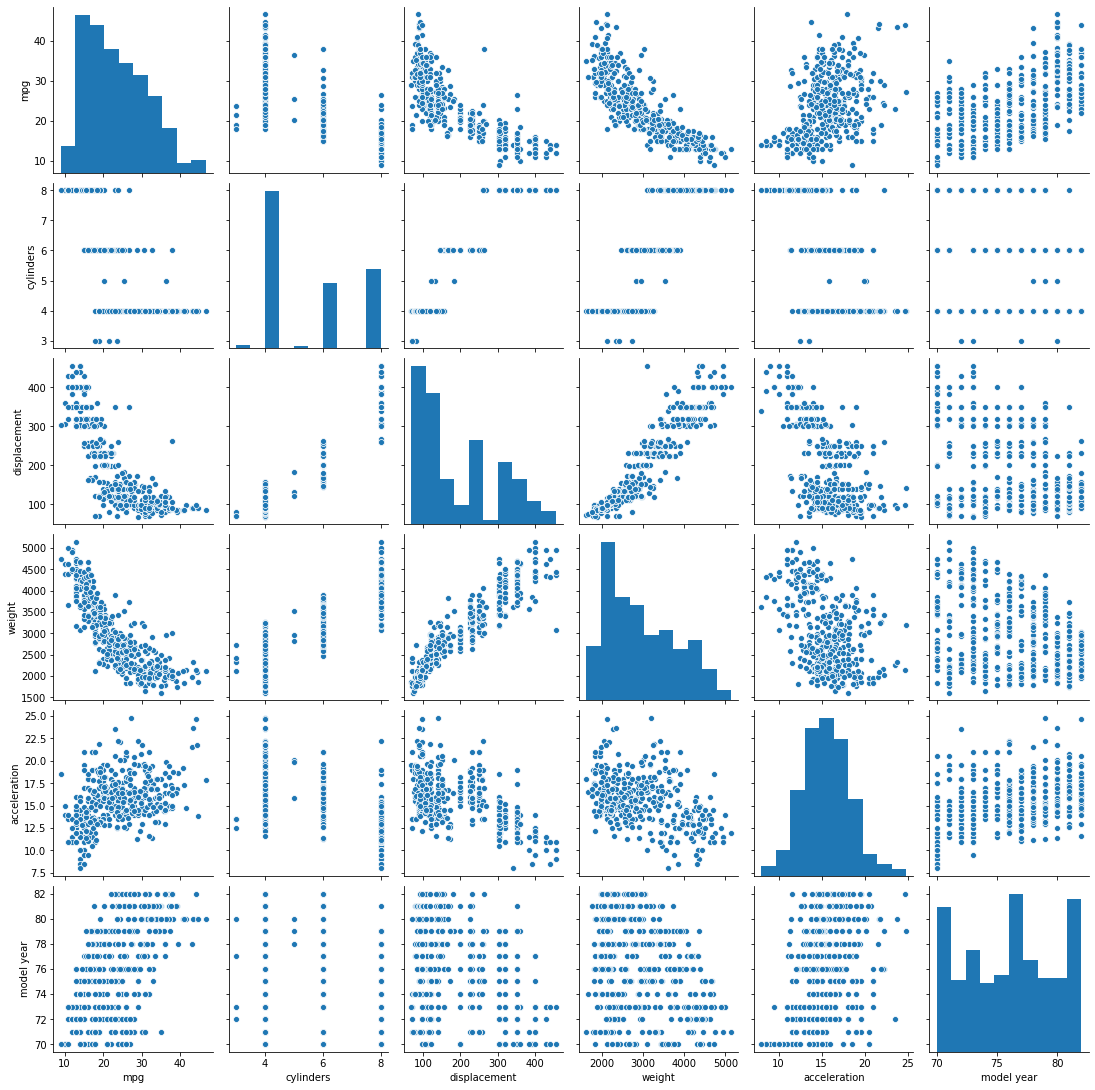

In [ ]:
sns.pairplot(df2)
plt.show()

And the same representation but indicating the cars with different colors according to their origin

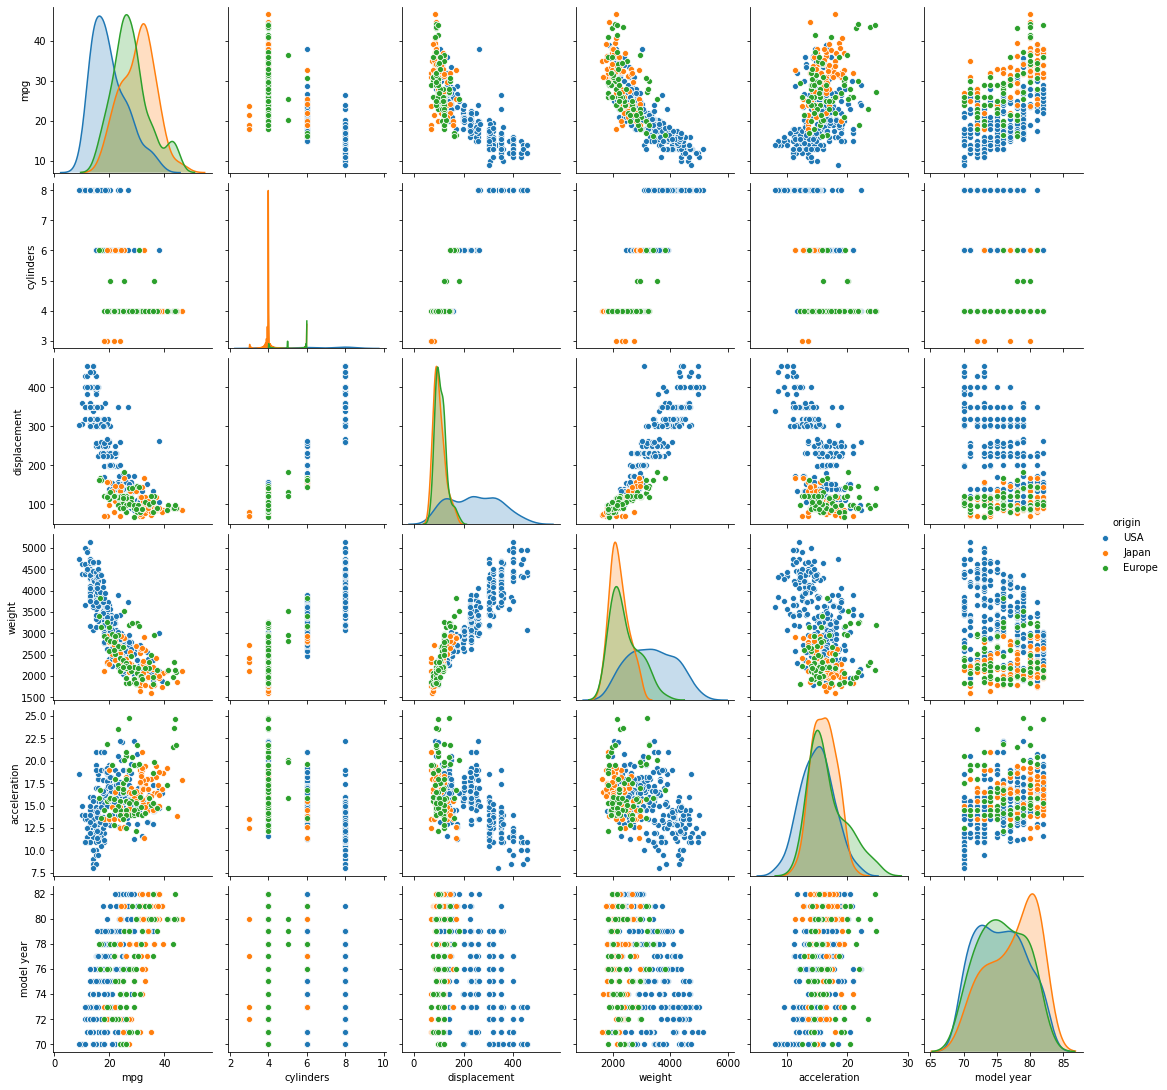

In [ ]:
sns.pairplot(df2,hue="origin")


Representing only the numerical features:

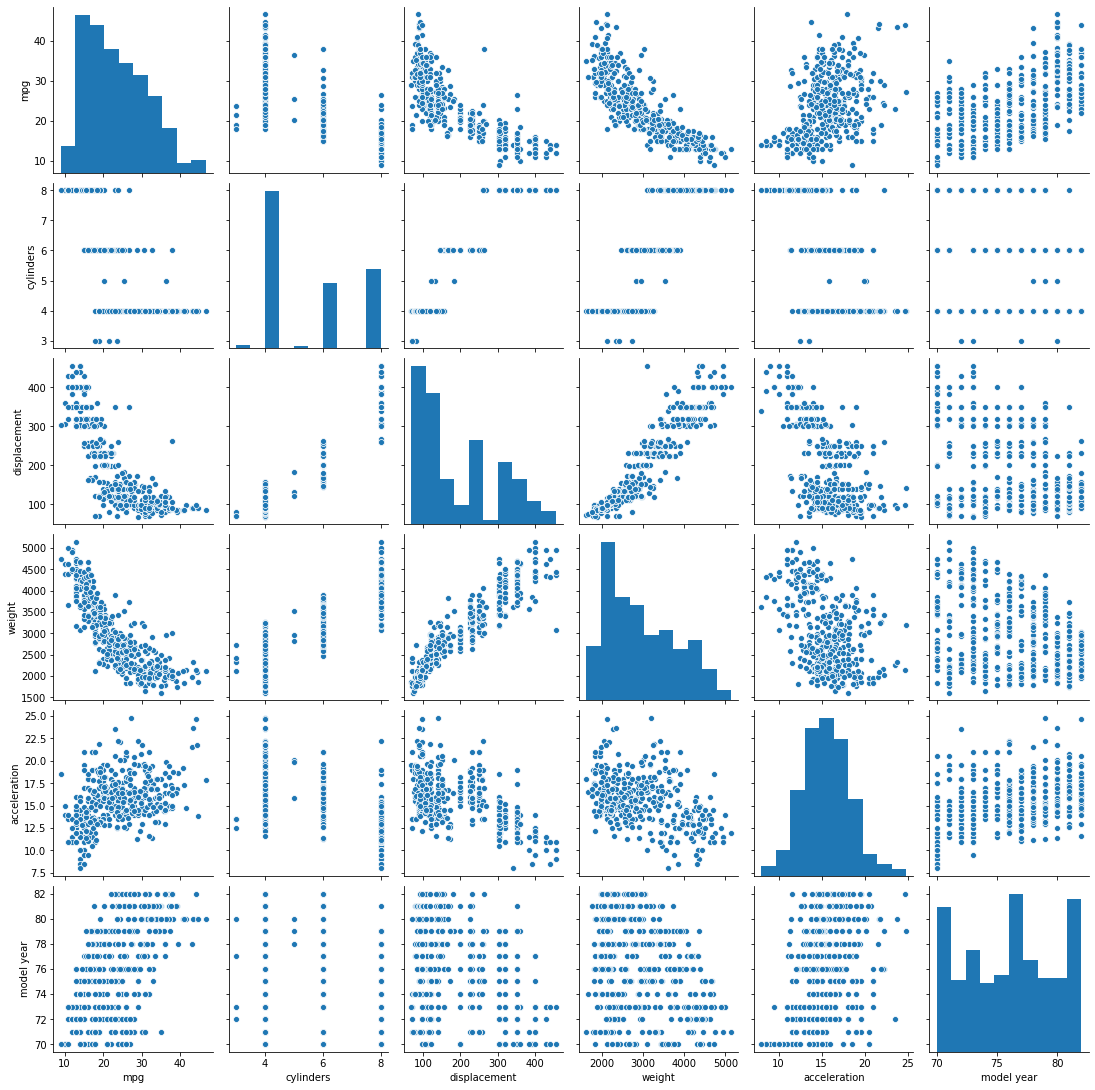

In [ ]:
df2_num = df2.select_dtypes(include='number')
sns.pairplot(df2_num)

## 3.2 Interactive plots with plotly

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')

fig = px.scatter_matrix(df,color="class")
fig.show()

### Images 

Plotly permitevisualizar imágenes de forma interactiva, acceso a valores de píxel, zoom, etc.

In [ ]:
import plotly.express as px
import skimage as sk
from skimage import data

import numpy as np
cat = data.chelsea()
fig = px.imshow(cat)
fig.show()

Plotly plots with shared axis:
https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from skimage.filters import gaussian
from skimage import img_as_ubyte

cat = data.chelsea()
cat_filtered = img_as_ubyte(gaussian(cat,sigma=1))

fig = make_subplots(rows=1, cols=2, shared_xaxes = 'all',shared_yaxes = 'all')

fig.add_trace(go.Image(z=cat), 1, 1)
fig.add_trace(go.Image(z=cat_filtered), 1, 2)
fig.update_layout(height=800, width=800, title_text="Subplots with Shared Axes")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.



## 3.3 Visualization of high-dimensional data

This technique projects multidimensional data into a lower dimension space by keeping relative distances between observations. The procedure applies an iterative opitmization scheme in order to obtain the optimal projection function. 

- Multidimensional Scaling (MDS) projects high dimensional data to a low-dimensionality space (typically 2D or 3D) {\bf keeping relative distances between observations}.
- Find a transformation satisfying $d_{ij}^k \approx f(d_{ij}^M)$, where 
$d_{ij}^M$ are pariwise distances between observations $(i,j)$ in the original M-dimensional space and $d_{ij}^k$ are distances in the low k-dimensional space ($k \ll M$). 
- MDS finds the transformation $f$ by minimizing the objective function:
\begin{equation*}
S(d_{ij}^k) = \sqrt{\frac{\sum_i \sum_j [f(d_{ij}^M)-d_{ij}^k]^2)]}{\sum_i \sum_j (d_{ij}^k)^2)}}
\end{equation*}

Generate artificial blobs:

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=5,random_state=0)

Exercise: Visualize 8-dimensional data using a 2d projection using MDS and t-SNE:

In [51]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances

# MDS:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=21,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(X)
pos_mds = mds.fit(similarities).embedding_

# T-SNE:

# Apply t-SNE algorithm:
tsne = manifold.TSNE(n_components=2, init='random', random_state=21, perplexity=30)
pos_tsne = tsne.fit_transform(X)


In [52]:
pos_mds.shape

(1000, 2)

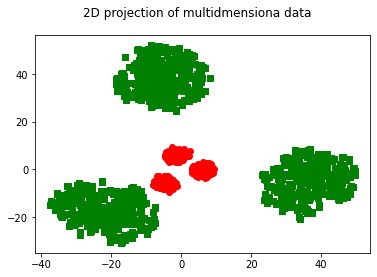

In [53]:
import pylab as py

# Represent data in the 2D MDS projection:
fig1 = py.figure()
py.scatter(pos_mds[:,0],pos_mds[:,1],marker='o',c='r')
py.scatter(pos_tsne[:,0],pos_tsne[:,1],marker='s',c='g')
fig1.suptitle('2D projection of multidmensiona data')
py.show()

# 4. Training a data classification model 

- LINEAR DISCRIMINANT ANALYSIS (LDA)
- NAÏVE BAYES
- KNN
- DECISION TREES 


## 4.1 LINEAR DISCRIMINANT ANALYSIS (LDA)

The Bayes theorem in the context of data classification:
\begin{equation*}
p(\omega_i|\vec{x}) = \frac{p(\vec{x}|\omega_i) p(\omega_i)}{p(\vec{x})}
\end{equation*}
where $\vec{x} = \{x_1,\dots,x_d\}$ is an observation in a d-dimensional feature space and $\omega_i$ is a label for class $i$. The distribution $p(\omega_i|\vec{x})$ is called **posterior distribution** and provides the probability of a class $\omega_i$ conditional to the observation of the data $\vec{x}$. $p(\vec{x}|\omega_i)$ is the **likelihood function** and models the class-conditional distribution of the observations. The **prior distribution** $p(\omega_i)$ describes the apriori occurrence of the different classes and can be modeled by an expert or by count data. The **marginal distribution** $p(\vec{x})$ is just a normalization constant and is not relevant for classification pourposes. 

Bayesian decision theory: Assign observation $\vec{x}$ to the class that maximizes the posterior probability $p(\omega_i|\vec{x})$:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} p(\omega_i|\vec{x}) 
\end{equation*}

We define the discriminant function $g_i(\vec{x})$ as:
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = \log p(\vec{x}|\omega_i) + \log p(\omega_i) + Constant
\end{equation*}

When all $G$ classes have equal prior probabilities $p(\omega_i)=1/G$, the Maximum a Posteriori decision is equivalent to a Maximum Likelihood since 
the posterior is proportional to the likelihood function $p(\omega_i|\vec{x}) \propto p(\vec{x}|\omega_i)$. 

Let's assume that observations $\vec{x}$ belonging to class $\omega_i$ are distributed according to a d-dimensional multivariate normal $N(\vec{\mu}_i,\Sigma_i)$. The likelihood is then given by:

\begin{equation*}
p(\vec{x}|\omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} 
\exp \{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)\}
\end{equation*}

and the discriminant function $g_i(\vec{x})$ is then given by:

\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i)
\end{equation*}

Multi-class supervised classification algorithm based on discriminant functions: 

[1] Construct a {\bf training set} of labeled observations $\mathcal{D}_i$ for each class $\omega_i, \, i=1,\dots,G$:

\begin{eqnarray*}
\mathcal{D}_i = \{\vec{x}_1,\dots,\vec{x}_N \}
\end{eqnarray*}

[2] Use training sets $\mathcal{D}_i, \, i=1,\dots,G$ to estimate the i-the class parameters $(\mu_i,\Sigma_i)$. 

[3] Classify a new unlabeled observation $\vec{x}_{new}$ to the class with maximum discriminant function:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} g_i(\vec{x}_{new}) 
\end{equation*}


Limit cases: 

- **Quadratic Discriminant Analysis (QDA)**: The complete model with full covariance matrices for each class. The decision boundary is quadratic. 

\begin{eqnarray*}
p(\vec{x}|\omega_i) &=& \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} \exp\{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)\} \\
g_i(\vec{x}) &=& \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) = -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) + Constants
\end{eqnarray*}

- **Linear Discriminant Analysis (LDA)**: Assumes that all classes share the same covariance matrix $\Sigma_i = \Sigma, i=1,\dots G$. The likelihood and discriminant functions are then given by: 

\begin{eqnarray*}
p(\vec{x}|\omega_i) &=& \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)\} \\
g_i(\vec{x}) &=& \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) = - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma^{-1} (\vec{x}-\mu_i)+\log p(\omega_i) + Constants
\end{eqnarray*}

- **Gaussian Naive Bayes (GNB)**: Assumes that the covariance matrices for each class are diagonal, therefore assuming independence between the features. The Gassian Naive Bayes assumes univariate normal distributions for each feature $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, i.e. 

$p(x_j|\omega_i) = \frac{1}{\sqrt{2\pi}\sigma_i} \exp \{- \frac{(x_j-\mu_i)^2}{2\sigma^2_i}\} $

\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_j|\omega_i) = \frac{\exp \{ -\frac{1}{2}\sum_{j=1}^d (\frac{x_j-\mu_i}{\sigma_i})^2\}}{(2\pi)^{d/2}\prod_{j=1}^d \sigma_i}
\end{equation*}

The resulting discriminant function is then given by

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}





### Linear Discriminant Analysis (LDA) on Synthetic data:

LDA assumes that the covariance matrix 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]
[2.]


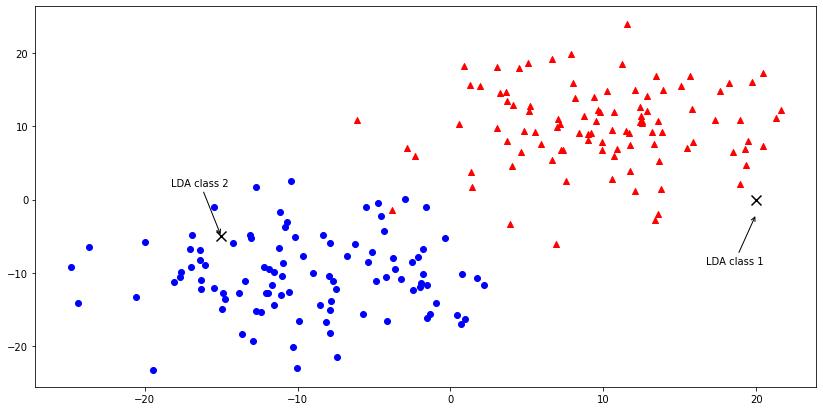

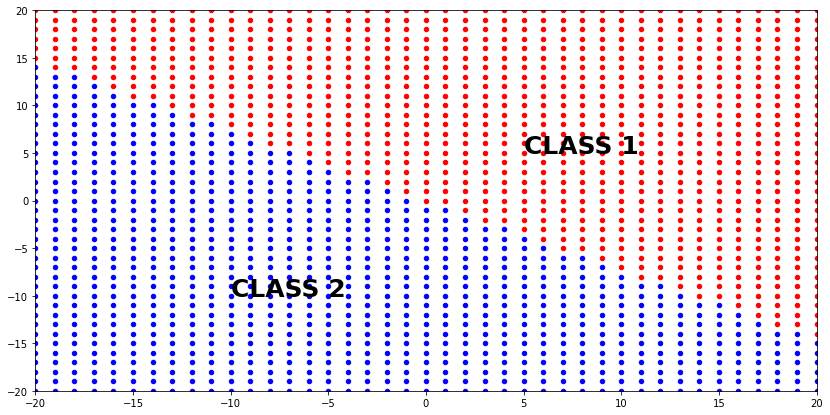

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Synthetic Gaussian training data:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Graphical representation of training data: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenate observations along the two dimensions:
XT = np.concatenate((X1,X2))

# Label observations according to class labels:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Training the model: 
clf = LinearDiscriminantAnalysis(n_components=2,priors=None)
clf.fit(XT, labelT)

#Prediction of new observations:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# Represent the new observations [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA class 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA class 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# Representation of the decision boundary by predicting the observations in a meshgrid:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'CLASS 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'CLASS 2',fontsize=25,fontweight='bold',color='k')
plt.show()

### Quadratic Discriminant Analysis on Synthetic data:

[1.]
[2.]


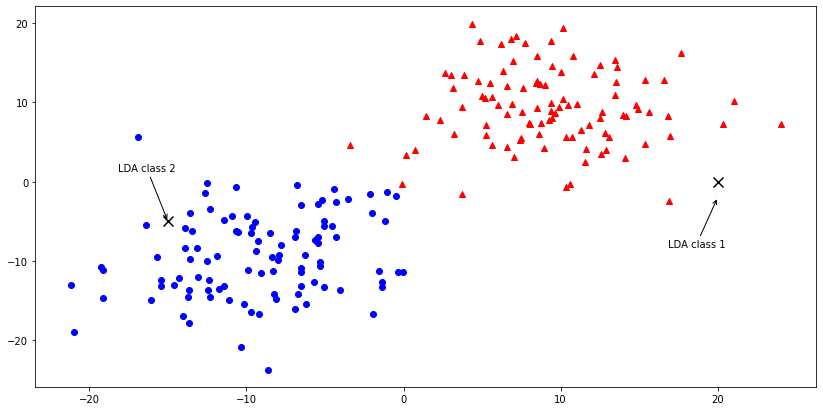

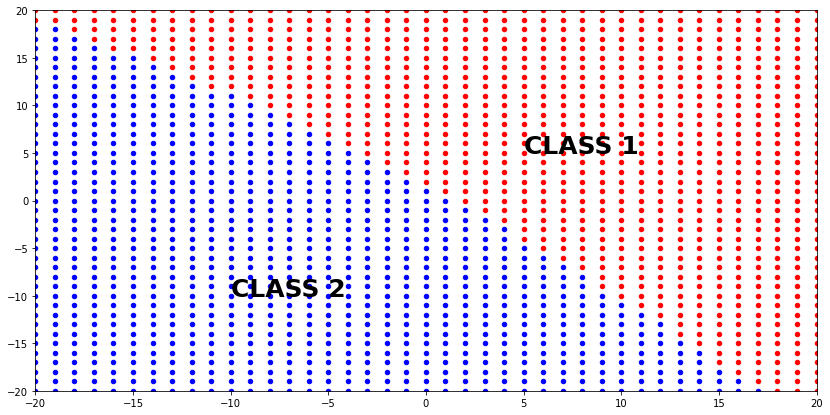

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Synthetic Gaussian training data:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Graphical representation of training data: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenate observations along the two dimensions:
XT = np.concatenate((X1,X2))

# Label observations according to class labels:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Training the model: 
clf = QuadraticDiscriminantAnalysis(priors=None)
clf.fit(XT, labelT)

#Prediction of new observations:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# Represent the new observations [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA class 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA class 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# Representation of the decision boundary by predicting the observations in a meshgrid:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'CLASS 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'CLASS 2',fontsize=25,fontweight='bold',color='k')
plt.show()

### Linear Discriminant Analysis with iris data:
Assumes equal covariance matrices for all the classes

In [56]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

clf_lda = LinearDiscriminantAnalysis(n_components=3,priors=None)
clf_lda_trained = clf_lda.fit(iris.data, iris.target)

clf_lda_trained.means_

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

### Quadratic Discriminant Analysis with iris data:

Does not assume equal covariance matrices for all the classes

In [57]:
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = datasets.load_iris()

clf_qda = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
clf_qda_trained = clf_qda.fit(iris.data, iris.target)

clf_qda_trained.covariance_

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

**Exercise: Two-class discriminant analysis with 2D features:**

Consider the training set: 

Class $\omega_1$: $\mathcal{D}_1 =\{(3,4),(2,6),(4,6),(3,8)\}$. 

Class $\omega_2$: $\mathcal{D}_2 =\{(3,0),(1,-2),(5,-2),(3,-4)\}$. 

- Obtain sample estimates of the mean and covariance matrix for each class.

- Obtain the discriminant functions $g_1(\vec{x}),g_2(\vec{x})$ assuming equal priors.

- Evaluate $g_1(\vec{x}),g_2(\vec{x})$ to classify a new observation $\vec{x}_{new} = (2,-1)$.

Result: $g_1(\vec{x}) = -(x_1-3)^2-\frac{1}{4}(x_2-6)^2$, $g_2(\vec{x}) = -\frac{1}{4}(x_1-3)^2-\frac{1}{4}(x_2+2)^2$.


## 4.2 NAÏVE BAYES

Assume that features $x_j$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{j=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_j \sim N(x_j|\mu_i,\sigma_i^2), j=1,\dots d$, the discriminant function $g_i(\vec{x})$ is: 

\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_j-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


### Example: Naive Bayes with iris dataset


In [58]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(y_pred)

from sklearn.metrics import confusion_matrix
y_true = iris.target
confusion_matrix(y_true, y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

## 4.3 K-nearest neighbours (KNN)

Very simple algorithm: An unlabeled observation is classified by assigning the label which is most frequent among the k training samples nearest to that point (i.e. the k-th nearest neighbours).

In the following example we simply define a set of 4 observations in 1d and assign them to two classes (0,1). Then fit the model and predict the class of new observations using the knn algorithm.


In [59]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

print('Training data {}'.format(X))
print('Class labels for training observations {}'.format(y))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
Xnew = np.array([2.5]).reshape(1, -1)
print('The knn prediction for observation Xnew= {} is {}'.format(*Xnew,knn.predict(Xnew)))
Xnew1 = np.array([0.5]).reshape(1, -1)
print('The knn prediction for observation Xnew= {} is {}'.format(*Xnew1,knn.predict(Xnew1)))

Training data [[0], [1], [2], [3]]
Class labels for training observations [0, 0, 1, 1]
The knn prediction for observation Xnew= [2.5] is [1]
The knn prediction for observation Xnew= [0.5] is [0]


## 4.4 DECISION TREES

- Classification And Regression Tress (CART): Solve both regression and classification problems. 

- Tree creation: We start from a training set of labelled observations. Data is splitted in child nodes by using binary queries. The query at each split is selected accoding to a measure of node impurity: A node is said to be pure if all the observations have the same label. 

- The grow of the binary tree creates a set of linear decision boundaries splitting the data in different groups.



### Decision trees with iris

In [60]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
iris = datasets.load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data,iris.target)

Represent the resulting tree structure for the test data:

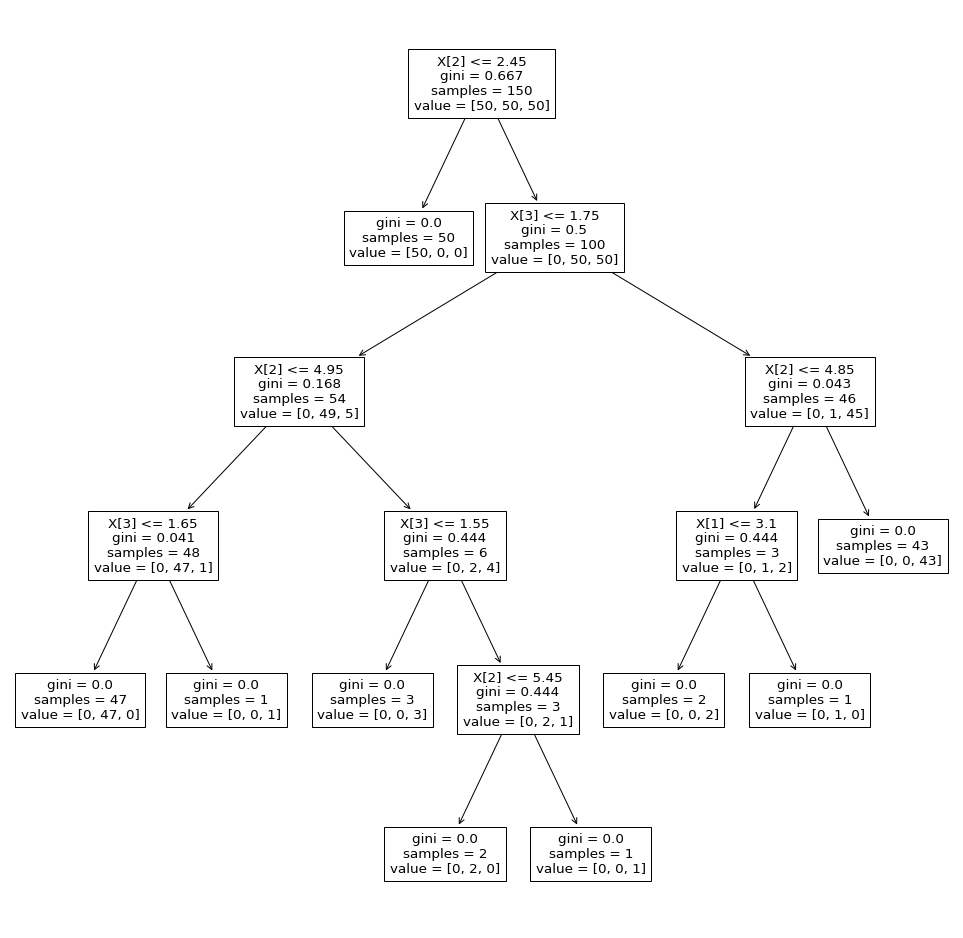

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(iris.data,iris.target)) 
plt.show()

Represent the decision boundary of the tree in a mutildimensional scatter plot (numerical features):

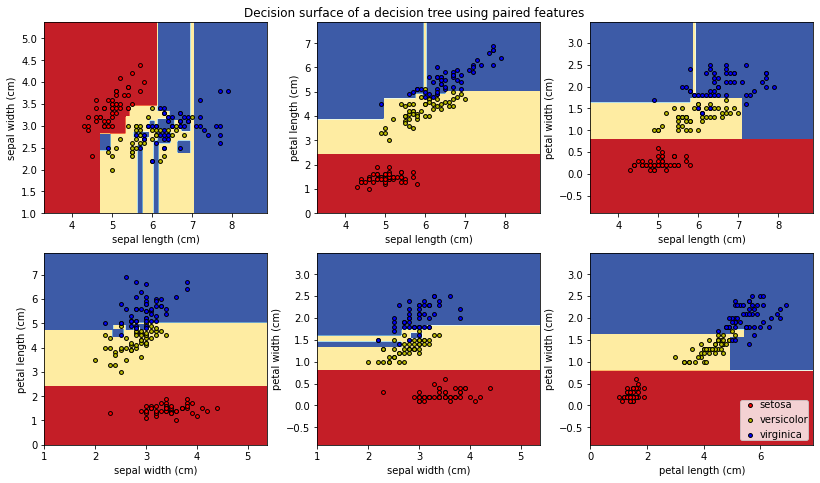

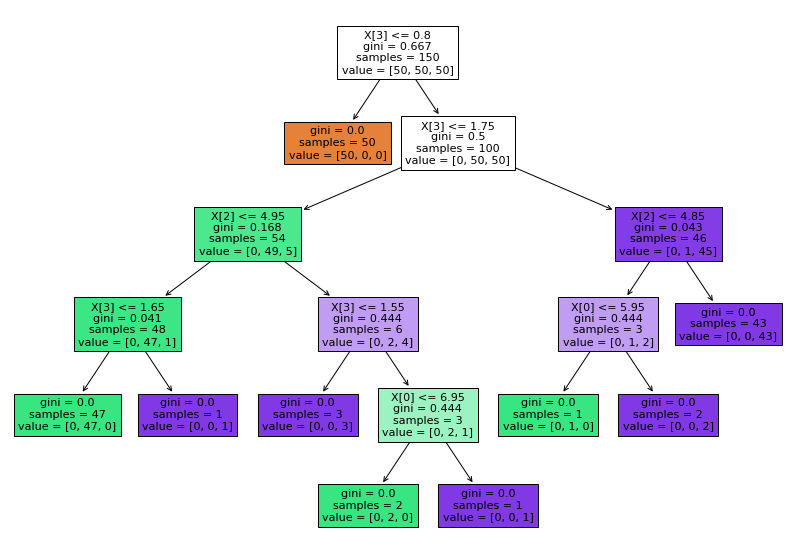

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(12,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(14,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

# 5. Evaluation of classification performance 

Type I and II errors, accuracy, recall, etc. 

- General testing procedure 
- Performance measures
- k-fold cross-validation



## 5.1 General testing procedure

Validation using training data: Wrong! 

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_pred = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

We should split data in training & test subsets, training with the train subset and validate using test: 

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                  train_size=0.7)
# fit the model on one set of data
model.fit(Xtrain, ytrain)

# evaluate the model on the second set of data
ytest_pred = model.predict(Xtest)
accuracy_score(ytest, ytest_pred)

0.9777777777777777

## 5.2 Performance measures

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In a binary classification problem (two-classes ), we define the following quantities:

- True positive (TP): Number of class 1 observations of that have been correctly predicted as class 1.
- True negative (TN): Number of class 0 observations of that have been correctly predicted as class 0.
- False positive (FP): Number of class 0 observations of that have been uncorrectly predicted as class 1 (false alarm, Type I error).
- False negative (FN): Number of class 1 observations of that have been uncorrectly predicted as class 0 (omission, Type II error)

From them we can define different measures of error: 

- Sensitivity, recall, hit rate, or true positive rate (TPR):

$\text{TPR} =\frac{TP}{TP+FN}$

- Specificity, selectivity or true negative rate (TNR):

$\text{TNR} =\frac{TN}{TN+FP}$

- F1 score: The harmonic mean of precision and sensitivity:

$\text{F1}={\frac {2TP}{2TP+FP+FN}}$.

### The confusion matrix

Matrix  is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$. In the sklearn implementation, rows correspond to actual class labels and columns to predicted class labels.

Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ytest_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Description of the available performance scores in sklearn libraries:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

### Multi-class scores

In [ ]:
CM = confusion_matrix(ytest, ytest_pred)
c00,c01,c02,c10,c11,c12,c20,c21,c22 = CM.ravel()

In [ ]:
print('Class names: {}'.format(list(iris.target_names)))
c_s_s,c_s_ve,c_s_vi,c_ve_s,c_ve_ve,c_ve_vi,c_vi_s,c_vi_ve,c_vi_vi = CM.ravel()

Class names: ['setosa', 'versicolor', 'virginica']


**Precision for each class:**

Number of correclty predicted observations of the class out of the total number of predictions of that class.

For instance, precision for the setosa class (class 0) is the number of correctly predicted setosa flowers out of all setosa predicted flowers:


In [ ]:
precision_setosa = c_s_s/(c_s_s+c_ve_s+c_vi_s)
precision_versicolor = c_ve_ve/(c_s_ve+c_ve_ve+c_vi_ve)
precision_virginica = c_vi_vi/(c_s_vi+c_ve_vi+c_vi_vi)

print('Precisions: Setosa {} , Versicolor {} , Virginica {}'.format(precision_setosa,precision_versicolor,precision_virginica))

Precisions: Setosa 1.0 , Versicolor 1.0 , Virginica 0.9166666666666666


**Recall for each class:** 

Number of correclty predicted observations of the class out of the total number of actual observations of that class.

For instance, recall for the setosa class (class 0) is the number of correctly predicted setosa flowers out of all setosa flowers:

In [ ]:
recall_setosa = c_s_s/(c_s_s+c_s_ve+c_s_vi)
recall_versicolor = c_ve_ve/(c_ve_s+c_ve_ve+c_ve_vi)
recall_virginica = c_vi_vi/(c_vi_s+c_vi_ve+c_vi_vi)
print('Recall: Setosa {} , Versicolor {} , Virginica {}'.format(recall_setosa,recall_versicolor,recall_virginica))

Recall: Setosa 1.0 , Versicolor 0.9444444444444444 , Virginica 1.0


### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### AUC-ROC

For binary classifiers, we can easily get the Area Under the Curve (AUC) of the Reciever Operating Characteristic (ROC) curve. The ROC curve is a curve representing the True Positive Rate (TPR) versus the False Positive Rate (FPR) 

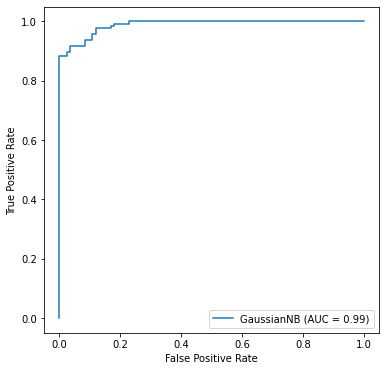

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer() # load a binary classification dataset
X_features = data.data
y_labels = data.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X_features, y_labels, random_state=0,
                                  train_size=0.6)
clf = GaussianNB()
clf.fit(Xtrain, ytrain)

fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(clf, Xtest, ytest, ax=ax)  
plt.show()

## 5.3 k-fold Cross-validation

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


In [ ]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

You can specify the performance score to be estimated using the k-fold cross-validation procedure:

In [ ]:
from sklearn import metrics
f1_scores = cross_val_score(model,X,y, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (f1_scores.mean(), f1_scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


Multiple scores can be evaluated simultaneously:

In [ ]:
from sklearn.model_selection import cross_validate
scores = ['precision_macro', 'recall_macro']
multiple_scores = cross_validate(model,X,y, cv=5, scoring=scores)
multiple_scores

{'fit_time': array([0.000736  , 0.00036192, 0.00040603, 0.00035954, 0.00032306]),
 'score_time': array([0.00416994, 0.00218964, 0.00214887, 0.00207901, 0.00208497]),
 'test_precision_macro': array([0.96969697, 0.96969697, 0.94444444, 0.93333333, 1.        ]),
 'test_recall_macro': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

k-fold cross-validation:

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 1

In [ ]:
kf1 = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf1,scoring='accuracy')

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

Custom performance metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
def tn(y, y_pred): return confusion_matrix(y, y_pred)[0, 0]
def fp(y, y_pred): return confusion_matrix(y, y_pred)[0, 1]
def fn(y, y_pred): return confusion_matrix(y, y_pred)[1, 0]
def tp(y, y_pred): return confusion_matrix(y, y_pred)[1, 1]
tn_score = make_scorer(tn)
fp_score = make_scorer(fp)
fn_score = make_scorer(fn)
tp_score = make_scorer(tp)

In [ ]:
[tn(ytest,ytest_pred)
,fp(ytest,ytest_pred)
,fn(ytest,ytest_pred)
,tp(ytest,ytest_pred)]

[16, 0, 0, 17]

In [ ]:
tp_score(model,X,y)

49

Multiple performance measures

In [ ]:
from sklearn.model_selection import cross_validate
custom_scores = {'tp': tp_score, 'tn': tn_score,'fp': fp_score, 'fn': fn_score}
cv_results = cross_validate(model,X,y,cv=10,scoring=custom_scores,return_train_score=True)

cv_results

{'fit_time': array([0.0006814 , 0.0003624 , 0.00033998, 0.00035524, 0.00035739,
        0.00034332, 0.00033855, 0.00033903, 0.00036049, 0.00041962]),
 'score_time': array([0.00487781, 0.00187731, 0.00185013, 0.00183177, 0.0019021 ,
        0.0018487 , 0.00192833, 0.00184464, 0.00181079, 0.00200605]),
 'test_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_tn': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'test_tp': array([5, 5, 5, 5, 3, 5, 4, 5, 5, 5]),
 'train_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'train_tn': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45]),
 'train_tp': array([45, 45, 45, 45, 45, 45, 45, 45, 45, 45])}

# 6. Hands-on exercise